<h1>FCTM</h1>
<p>This tutorial will introduce you to FCTM fragment centric topographical mapping of a single snapshot. For older version, click <a href="https://www.nyu.edu/projects/yzhang/AlphaSpace/" target="_blank">here</a>.</p>

<p>Please note several functionalities have been changed or deprecated in this version, If you are familiar with AlphaSpace 1.0, here you will see some reference to its tutorial, otherwise you can ignore them.</p>


# 1. Program requirements

Python, SciPy, NumPy, Mdtraj, Jupyter

These dependencies should be installed automatically when you install AlphaSpace.

To view how to install, please proceed to [README.md](../README.md)

Now AlphaSpace 2.0 no longer requires Naccess for ASA calculation, it is replaced by [Shrake and Rupley](http://mdtraj.org/1.7.2/examples/solvent-accessible-surface-area.html).

# 2. Load PDB File

AlphaSpace 2.0 can process multiple snapshots from a simulation, but for now let's start with a single snapshot. We will use the mdm2-p53 complex, same as 1.0 tutorial.

AlphaSpace can map a complete protein surface or can be restricted to map just the interface between a receptor protein and a binding partner. The "receptor"/"protein" part and the "binder"/"ligand" part can be automatically identified, or manually set.

First Import the modules, you should see them

In [1]:
import alphaspace2 as al
import mdtraj
import os
import matplotlib.pyplot as plt

In [2]:
# Load in receptor and ligand seperately using mdtraj. So you can load anything that is supported by mdtraj.
receptor = mdtraj.load("DataSet/bcl2/BclXL_BAK/prot.pdb")
binder = mdtraj.load("DataSet/bcl2/BclXL_BAK/lig.pdb")

In [3]:
# If you have the pdbqt file of the receptor, you can calculate the Vina Score. You can load the pdbqt file like this
al.annotateVinaAtomTypes(pdbqt="DataSet/bcl2/BclXL_BAK/prot.pdbqt", receptor=receptor)

In [5]:
# Initialize a snapshot object, this will contain the receptor and the binder informations
ss = al.Snapshot()
# Run the snapshot object by feeding it receptor and binder mdtraj objects.
ss.run(receptor=receptor, binder=binder)

In [6]:
# You can use a simple for loop to iterate over all pockets found in the snapshot
pocket_index = 0
for p in sorted(ss.pockets, key=lambda i: i.nonpolar_space, reverse=True):
    if p.isContact:
        pocket_index+=1
        print(
            "Pocket {} has alpha-space of {} A3, BetaScore of {:.1f} kcal/mol and is {:.0f}% occupied".format(
                pocket_index, round(p.nonpolar_space), p.score,(p.occupancy_nonpolar * 100))
        )
        print(p.occupiedNonpolarSpace, p.nonpolar_space)

Pocket 1 has alpha-space of 261.0 A3, BetaScore of -7.3 kcal/mol and is 47% occupied
121.87071888574829 261.20203037165624
Pocket 2 has alpha-space of 131.0 A3, BetaScore of -4.3 kcal/mol and is 26% occupied
34.33512597217595 131.00905192848097
Pocket 3 has alpha-space of 62.0 A3, BetaScore of -3.4 kcal/mol and is 92% occupied
57.39469006494016 62.47818658086766
Pocket 4 has alpha-space of 61.0 A3, BetaScore of -3.4 kcal/mol and is 56% occupied
33.6992478405782 60.62993655706956
Pocket 5 has alpha-space of 39.0 A3, BetaScore of -1.3 kcal/mol and is 76% occupied
29.334721217619602 38.62665981145159
Pocket 6 has alpha-space of 36.0 A3, BetaScore of -1.9 kcal/mol and is 72% occupied
25.98141360616255 36.21373272753812
Pocket 7 has alpha-space of 25.0 A3, BetaScore of -1.9 kcal/mol and is 41% occupied
10.330030167872984 25.182957384247047
Pocket 8 has alpha-space of 19.0 A3, BetaScore of -1.6 kcal/mol and is 7% occupied
1.3162155384474894 19.237193605676545
Pocket 9 has alpha-space of 11.0

In [7]:
# You can use a simple for loop to iterate over all pockets found in the snapshot
pocket_index = 0
for p in sorted(ss.pockets, key=lambda i: i.space, reverse=True):
    if p.isContact:
        pocket_index+=1
        print(
            "Pocket {} has alpha-space of {} A3, BetaScore of {:.1f} kcal/mol and is {:.0f}% occupied".format(
                pocket_index, round(p.space), p.score,(p.occupancy * 100))
        )

Pocket 1 has alpha-space of 265.0 A3, BetaScore of -7.3 kcal/mol and is 46% occupied
Pocket 2 has alpha-space of 163.0 A3, BetaScore of -4.3 kcal/mol and is 26% occupied
Pocket 3 has alpha-space of 132.0 A3, BetaScore of -3.4 kcal/mol and is 61% occupied
Pocket 4 has alpha-space of 68.0 A3, BetaScore of -3.4 kcal/mol and is 92% occupied
Pocket 5 has alpha-space of 67.0 A3, BetaScore of -1.3 kcal/mol and is 67% occupied
Pocket 6 has alpha-space of 60.0 A3, BetaScore of -1.9 kcal/mol and is 65% occupied
Pocket 7 has alpha-space of 51.0 A3, BetaScore of -1.6 kcal/mol and is 11% occupied
Pocket 8 has alpha-space of 51.0 A3, BetaScore of -1.9 kcal/mol and is 38% occupied
Pocket 9 has alpha-space of 46.0 A3, BetaScore of -1.8 kcal/mol and is 26% occupied
Pocket 10 has alpha-space of 3.0 A3, BetaScore of -0.6 kcal/mol and is 35% occupied


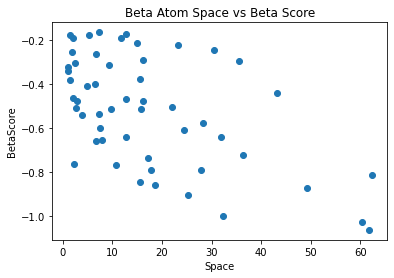

In [8]:
spaces = []
scores = []

for p in sorted(ss.pockets, key=lambda i: i.space, reverse=True):
    if p.isContact:
        for beta in p.betas:
            spaces.append(beta.space)
            scores.append(beta.score)
            
plt.scatter(x = spaces,y = scores)
plt.xlabel("Space")
plt.ylabel("BetaScore")
plt.title('Beta Atom Space vs Beta Score')
plt.show()

To visualize the system, you can call the save method from the snapshot

In [15]:
ss.save(receptor=receptor,binder=binder, output_dir='DataSet/bcl2/BclXL_BAK/')

<img src="Example_proteins/BclXL_BAK/bclxl-bak.png" style="height:300px">
